In [28]:
#depedencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [31]:
#importing csvs
path_for_combined = ('resources/income_unemp_full.csv')
path_for_county = ('resources/income_unemp_county.csv')
path_for_fedstate = ('resources/us_mn_only.csv')

full_df = pd.read_csv(path_for_combined)
county_df = pd.read_csv(path_for_county)
fedstate_df = pd.read_csv(path_for_fedstate)

county_df.replace(',', '', inplace=True, regex=True)
county_df['Income'] = pd.to_numeric(county_df['Income']).astype(int)


In [32]:
county_df.head()


,County,People (Unemployed),Unemployed(%),Rank(Unemployed),Income,Rank(Income)
0,Mahnomen County,227,10.2,3054,53925,2425
1,Wadena County,406,5.8,2339,56882,2198
2,Aitkin County,385,5.8,2339,59498,1965
3,Swift County,188,4.0,1219,62601,1665
4,Martin County,449,4.4,1487,62969,1628


In [ ]:
#linregress for unemployment vs income totals
slope, intercept, r_value, p_value, std_err = stats.linregress(county_df['People (Unemployed)'], county_df['Income'])

unemp_income_stats = [slope, intercept, r_value, p_value, std_err]
print(f'slope: {slope} \nintercept: {intercept} \nr_value: {r_value} \np_value: {p_value} \nstd_err: {std_err}')

slope: 1.2799377143549338 
intercept: 73957.78366628691 
r_value: 0.37719762175532195 
p_value: 0.0003165439133069299 
std_err: 0.3408660049405001


In [ ]:
#finding quartiles, iqr and limits for outliers
def quarties(var):
    q1 = np.quantile(var, .25)
    med = np.quantile(var, .5)
    q3 = np.quantile(var, .75)
    iqr = q3 - q1
    print(f'Q1: {q1} \nMedian: {med} \nQ3: {q3} \nIQR: {iqr}\nLower Fence: {q1 - (iqr * 1.5)} \nUpper Fence: {(iqr * 1.5) + q3}\n')


unemp_totals = county_df['People (Unemployed)']
income_totals = county_df['Income']

unemp_quarties = quarties(unemp_totals)
income_quarties = quarties(income_totals)

Q1: 182.5 
Median: 388.0 
Q3: 912.5 
IQR: 730.0
Lower Fence: -912.5 
Upper Fence: 2007.5

Q1: 69100.5 
Median: 71573.0 
Q3: 77582.0 
IQR: 8481.5
Lower Fence: 56378.25 
Upper Fence: 90304.25



In [67]:
#finding outliers
unemp_search = []
for i in county_df['People (Unemployed)']:
    if  i > 2007.5:
        unemp_search.append(i)
    else: pass

unemp_outliers = county_df[county_df['People (Unemployed)'].isin(unemp_search)]


income_search_upper = []
income_search_lower = []
for i in county_df['Income']:
    if  i > 90304.25:
        income_search_upper.append(i)
    elif i < 56378.25:
        income_search_lower.append(i)
    else: pass

income_outliers_upper = county_df[county_df['Income'].isin(income_search_upper)]
income_outliers_lower = county_df[county_df['Income'].isin(income_search_lower)]

print(f'Upper: {income_outliers_upper} \nLower: {income_outliers_lower}')




Upper:                County  People (Unemployed)  Unemployed(%) Rank(Unemployed)  \
76       Dodge County                  355            3.1              661   
77     Olmsted County                 3232            3.6              951   
78    Hennepin County                31494            4.3             1433   
79     Chisago County                 1211            3.9             1152   
80       Anoka County                 7966            3.9             1152   
81   Sherburne County                 1807            3.3              755   
82      Dakota County                 8985            3.6              951   
83      Wright County                 1717            2.1              271   
84  Washington County                 4850            3.3              755   
85       Scott County                 2633            3.0              602   
86      Carver County                 1910            3.1              661   

    Income Rank(Income)  
76   92943          224  
77  

In [70]:


unemp_percent = county_df['Unemployed(%)']
unemp_percent_quarties = quarties(unemp_percent)

unemp_percent_upper = []
unemp_percent_lower = []
for i in county_df['Unemployed(%)']:
    if  i > 6.73:
        unemp_percent_upper.append(i)
    elif i < .525:
        unemp_percent_lower.append(i)
    else: pass

unemppercent_outliers_upper = county_df[county_df['Unemployed(%)'].isin(unemp_percent_upper)]
unemppercent_outliers_lower = county_df[county_df['Unemployed(%)'].isin(unemp_percent_lower)]

print(f'Upper: {unemppercent_outliers_upper} \nLower: {unemppercent_outliers_lower}')


Q1: 2.8499999999999996 
Median: 3.7 
Q3: 4.4 
IQR: 1.5500000000000007
Lower Fence: 0.5249999999999986 
Upper Fence: 6.725000000000001

Upper:               County  People (Unemployed)  Unemployed(%) Rank(Unemployed)  \
0    Mahnomen County                  227           10.2             3054   
7  Clearwater County                  286            7.4             2824   

   Income Rank(Income)  
0   53925         2425  
7   64934         1439   
Lower: Empty DataFrame
Columns: [County, People (Unemployed), Unemployed(%), Rank(Unemployed), Income, Rank(Income)]
Index: []


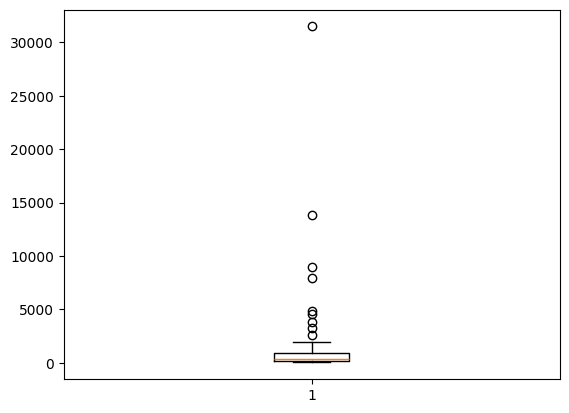

In [ ]:

fig, ax = plt.subplots()



bplot = ax.boxplot(county_df['People (Unemployed)'])